<a href="https://colab.research.google.com/github/mairakhan5/mairakhan5/blob/main/Lecture_1_Follow_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Data download
#@markdown This cell contains code to retrieve the dataset for our tutorial. You can ignore its contents, for the most part
! pip install gdown > /dev/null
import gdown

url = 'https://drive.google.com/uc?id=1PlmrlTUf8Ev1huKHfxicZyDXK7ZmPHhL'
gdown.download(url, 'titanic_data.csv', quiet=False)

url = 'https://drive.google.com/uc?id=1GxY6eXFRgLNTbfCouiIsKC4GZQWoXwAE'
gdown.download(url, 'titanic_data_raw.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PlmrlTUf8Ev1huKHfxicZyDXK7ZmPHhL
To: /content/titanic_data.csv
100%|██████████| 60.8k/60.8k [00:00<00:00, 43.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GxY6eXFRgLNTbfCouiIsKC4GZQWoXwAE
To: /content/titanic_data_raw.csv
100%|██████████| 157k/157k [00:00<00:00, 24.5MB/s]


'titanic_data_raw.csv'

In [ ]:
import pandas as pd
import seaborn as sns

%matplotlib inline

# Lecture 1
# Introduction to data wrangling

## Intro to Pandas

### Reading data

We will be working with a CSV (comma-separated values) file, a simple file format used to store tabular data, such as a spreadsheet or database, in plain-text form. Each line in a CSV file represents a row in the table, and each field within that row is separated by a comma. Commonly (albeit not always), the first line contains a header, which identifies each column. CSV files are widely supported by many types of software, including spreadsheets, word processors, and data analysis tools, making them a convenient choice for data exchange and storage.

In [ ]:
! head -n5 titanic_data.csv

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",,1,female,1,1,
2,3,26.0,,S,7.925,"Heikkinen, Miss. Laina",,3,female,,1,STON/O2. 3101282
3,4,35.0,C123,S,,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,,1,113803


The following code reads in a CSV file called 'titanic_data.csv' using Pandas' `read_csv` function and stores the contents of the file in a Pandas DataFrame. The DataFrame allows you to manipulate and analyze the data in a tabular format.

The `read_csv` function takes in the file path or URL of the CSV file as its first argument, and has a number of optional parameters that allow you to specify how the file should be read and processed. For example, you can specify the separator character that is used to delimit the fields in the file, whether or not the file has a header row, and which columns should be read in as part of the data. Once the file is read in, you can use various Pandas functions to manipulate and analyze the data in the dataframe.

In [ ]:
import pandas as pd

df = pd.read_csv('titanic_data.csv')

By the way, if you forget what a function does or what arguments it takes in, you can use the `?` magic command in a Jupyter Notebook or the `help()` function in Python to display the function's documentation. This will typically include a brief description of what the function does, as well as a list of its arguments, their default values, and what they do.

The DataFrame offers all sorts of functions to calculate different magnitudes. Most of these functions are self-explanatory, like `.mean()`, `.mode()`, `.median()`, `.max()`, `.min()`, and many others. If you can think of some statistical function, there almost certainly is a function for that in Pandas.

For example, we can compute the mean age (and the corresponding standard deviation) of the passengers at the Titanic:

In [ ]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

print(f'Mean age of the passengers: {mean_age:0.1f} +/- {std_age:0.1f} years')

Mean age of the passengers: 29.5 +/- 14.6 years


We can also find the number of times a different (categorical) value appears:

In [ ]:
df['Embarked'].value_counts()

S    577
C    144
Q     72
Name: Embarked, dtype: int64

### Querying the data

Pandas can do far more than just calculating simple values. One of the most powerful features of Pandas is the ability to make queries on the data stored in a DataFrame. This allows you to filter the data and select only the rows and columns that are relevant to your analysis, making it easier to work with large and complex datasets. There are several ways to make queries on a Pandas dataframe, including using boolean indexing, the `query()` method, and the `apply()` method. In this series of lectures, we will discuss boolean indexing, which I think is the most natural, but you can easily check out the other methods in the Pandas documentation.

The idea behind boolean indexing is:

``df[ some_boolean_array ] = DataFrame containing only values where some_boolean_array is True``

For example, if we wanted to get all the Titanic survivors, we could do something like:

In [ ]:
df[ df.Survived == True ]

,Unnamed: 0,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
1,1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,1.0,female,1.0,1,NaN
2,2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",NaN,3.0,female,NaN,1,STON/O2. 3101282
3,3,4,35.0,C123,S,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1.0,female,NaN,1,113803
8,8,9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0,3.0,female,0.0,1,347742
9,9,10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,2.0,female,NaN,1,237736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,875,876,15.0,NaN,C,7.2250,"Najib, Miss. Adele Kiamie ""Jane""",0.0,NaN,female,0.0,1,2667
879,879,880,56.0,C50,C,83.1583,NaN,NaN,1.0,female,0.0,1,11767
880,880,881,25.0,NaN,S,26.0000,"Shelley, Mrs. William (Imanita Parrish Hall)",NaN,2.0,female,0.0,1,230433
887,887,888,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,1.0,female,0.0,1,112053


This method also enables very complex queries, just by chaining different boolean arrays:

``df[ (boolean_array1) & (boolean_array2) ] = DataFrame containing values where both arrays are True``

For example, if we wanted to get all male survivors that were younger than 20 years old, we could do:

In [ ]:
df[(df.Survived == True) & (df.Sex == 'male') & (df.Age <= 20)]

,Unnamed: 0,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
78,78,79,0.83,NaN,S,29.0000,"Caldwell, Master. Alden Gates",2.0,2.0,male,0.0,1,248738
125,125,126,12.00,NaN,C,11.2417,"Nicola-Yarred, Master. Elias",0.0,3.0,male,NaN,1,2651
165,165,166,9.00,NaN,S,20.5250,"Goldsmith, Master. Frank John William ""Frankie""",NaN,3.0,male,0.0,1,363291
183,183,184,1.00,F4,S,39.0000,"Becker, Master. Richard F",1.0,2.0,male,2.0,1,230136
193,193,194,3.00,F2,S,26.0000,"Navratil, Master. Michel M",NaN,2.0,male,1.0,1,230080
204,204,205,18.00,NaN,S,8.0500,NaN,0.0,3.0,male,0.0,1,A/5 3540
226,226,227,19.00,NaN,S,NaN,"Mellors, Mr. William John",NaN,2.0,male,0.0,1,SW/PP 751
305,305,306,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2.0,1.0,male,1.0,1,113781
340,340,341,2.00,NaN,S,26.0000,"Navratil, Master. Edmond Roger",1.0,2.0,male,NaN,1,230080
348,348,349,3.00,NaN,S,15.9000,"Coutts, Master. William Loch ""William""",1.0,3.0,male,1.0,1,C.A. 37671


The `&` symbol represents the `AND` operator in Python. Note that there are two other logical operators: `|`, which stands for `OR`, and `~`, which stands for `NOT`. We will not be using them in this lecture, but they do exist and they can be really useful for data manipulation.

**Exercise 1**. Let's use these functions in a practical case. 

- Build a query to find all male passengers (`Sex` is male), and another query to find all female passengers (`Sex` is female). Calculate the proportion of these passengers that survived (this is equivalent to the mean of the `Survived` column for the corresponding sub-DataFrame). What hypothesis stems from this data?
- Build a query to find all passengers who were women (`Sex` is female), had no parents or children (`Parch` is 0) and also no siblings or spouses (`SibSp` is 0). Look at their average ages; is there anything interesting you can learn?
- Build a query to separate the DataFrame into passengers that embarked in Southampton (`Embark` is `S`), Queenstown (`Embark` is `Q`) and Cherbourg (`Embark` is `C`). Look at the average fare (`Fare`) and survival (`Survived`); what hypothesis stems from this data?

In [ ]:
male_df = df[ df['Sex'] == 'male' ]
female_df = df[ df['Sex'] == 'female' ]
print('Male survival', male_df['Survived'].mean())
print('Female survival', female_df['Survived'].mean())

Male survival 0.18093385214007782
Feale survival 0.7323943661971831


In [ ]:
query1_df = df[ (df['Sex'] == 'female') & (df['Parch'] == 0) & (df['SibSp'] == 0) ]
query1_df['Age'].mean()

29.91269841269841

In [ ]:
southampton = df[ df.Embarked == 'S' ]
queenstown = df[ df.Embarked == 'Q']
cherbourg = df[ df.Embarked == 'C' ]

print('S', southampton['Fare'].mean(), southampton['Survived'].mean())
print('Q', queenstown['Fare'].mean(), queenstown['Survived'].mean())
print('C', cherbourg['Fare'].mean(), cherbourg['Survived'].mean())

S 27.07111938579655 0.3431542461005199
Q 13.509192647058825 0.3611111111111111
C 53.99031317829458 0.5555555555555556


## Exploratory data analysis

The first step in any data science pursuit is to closely examine the data at hand, what we normally refer to as Exploratory Data Analysis (EDA). Through visualization and statistical techniques, EDA helps you get a better understanding of the data and can identify any potential issues or problems that may need to be addressed. It is an iterative process that involves continually asking and answering questions about the data and can help generate ideas for further analysis or modeling. EDA is conducted early on in the data analysis process, before building advanced models or making formal conclusions about the data.


### Summary statistics

One of the first tasks in exploratory data analysis is to look at summary statistics that tell us how the data is distributed. Summary statistics provide a quick and easy way to get a high-level overview of the main characteristics of the data, and also help diagnose some potential problems (_e.g._, what happens if most of your data comes from young female passengers of the Titanic, but your product is marketed towards old white men). The first step is normally to use the `.describe()` function:

In [ ]:
df.describe(include='all')

,Unnamed: 0,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,891.000000,891.000000,648.000000,186,793,807.000000,803,797.000000,798.000000,798,800.000000,891.000000,819
unique,NaN,NaN,NaN,137,3,NaN,803,NaN,NaN,2,NaN,NaN,634
top,NaN,NaN,NaN,B96 B98,S,NaN,"Braund, Mr. Owen Harris",NaN,NaN,male,NaN,NaN,347082
freq,NaN,NaN,NaN,4,577,NaN,1,NaN,NaN,514,NaN,NaN,7
mean,445.000000,446.000000,29.516466,NaN,NaN,30.960145,NaN,0.381430,2.310777,NaN,0.516250,0.383838,NaN
std,257.353842,257.353842,14.575949,NaN,NaN,45.626861,NaN,0.806728,0.831415,NaN,1.105107,0.486592,NaN
min,0.000000,1.000000,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,222.500000,223.500000,20.000000,NaN,NaN,7.910400,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,445.000000,446.000000,28.000000,NaN,NaN,14.458300,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,667.500000,668.500000,38.000000,NaN,NaN,31.000000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


Note that this function computes different statistics depending on the data type. For example, on numeric data, it will compute the mean, standard deviation, and quartiles, while on categorical data, it will compute the count and proportions of each category.

In most data science endeavors, it is common to have a measure of domain-specific knowledge beforehand, which can be used to provide early hypotheses to be tested on the data and used to drive the first models. For example, in the Titanic dataset we intuitively expect that women and children will be more likely to survive (due to the Birkenhead drill, "women and children first"). After that, we also have an understanding that wealthier passengers will have been more likely to get to a boat quickly. These hypotheses are not necessarily true -- we will see from the data --, but offer a good first point to start testing.

A very useful function for testing these hypothesis is the `.groupby()` method, which is used to group a dataframe by one or more columns and apply a function to each group. The protocol implies choosing a variable to divide the data, and then apply functions like `.mean()` or `.count()` to see how these differ. For example, we can use the `.groupby()` idiom to see how the age of the passengers that embarked in different ports varied:

In [ ]:
df.groupby('Embarked').mean()

,Unnamed: 0,PassengerId,Age,Fare,Parch,Pclass,SibSp,Survived
Embarked,,,,,,,,
C,445.180556,446.180556,29.337576,53.990313,0.373016,1.944444,0.403101,0.555556
Q,414.986111,415.986111,27.875000,13.509193,0.200000,2.937500,0.380952,0.361111
S,446.015598,447.015598,28.810948,27.071119,0.413592,2.328273,0.550000,0.343154


**Exercise 2**. Repeat the outcomes of the previous exercise using `groupby()`. This time consider not only the means (`.mean()`), but also the standard deviation (`.std()`), which is a measure of spread around the mean. 

In [ ]:
df.groupby('Embarked').mean()

,Unnamed: 0,PassengerId,Age,Fare,Parch,Pclass,SibSp,Survived
Embarked,,,,,,,,
C,445.180556,446.180556,29.337576,53.990313,0.373016,1.944444,0.403101,0.555556
Q,414.986111,415.986111,27.875000,13.509193,0.200000,2.937500,0.380952,0.361111
S,446.015598,447.015598,28.810948,27.071119,0.413592,2.328273,0.550000,0.343154


In [ ]:
df.groupby('Embarked').std()

,Unnamed: 0,PassengerId,Age,Fare,Parch,Pclass,SibSp,Survived
Embarked,,,,,,,,
C,264.818704,264.818704,15.341324,78.866296,0.678046,0.940685,0.579862,0.498638
Q,258.727683,258.727683,18.082089,14.890959,0.711512,0.302109,0.850589,0.483693
S,255.446154,255.446154,14.237985,34.977438,0.833287,0.792321,1.202678,0.475174


### Plots

Looking at numbers is great and all, and being comfortable with statistical estimates is crucial to become an adept data scientist, but if you really want to learn from your data, you need to learn how to interpret plots. Plots can reveal patterns and trends in the data that might not be immediately apparent from looking at raw numbers, and can help you identify anomalies or outliers that may need further investigation. Plots can also help you clearly and concisely convey your findings to stakeholders, and can be an effective way to engage and inform your audience.

Pandas provides functionality to make a number of useful plots:

- Pie charts (`.pie()`)
- Histograms (`.hist()`)
- Scatter plots (`.scatter()`)

And many others, which you can check on the Pandas documentation.

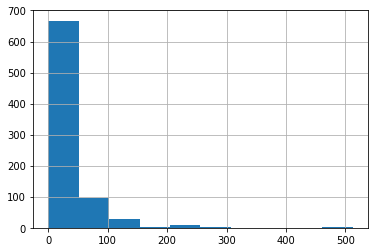

In [ ]:
df['Fare'].hist()

While Pandas functions will suit most of your immediate needs, there are many visualization libraries available in Python that are built on top of Pandas, such as Seaborn, Plotly, and Bokeh, which provide a wide range of powerful and flexible tools for creating various types of plots and charts. These libraries are designed to make it easy to create high-quality visualizations with minimal effort, and offer many advanced features such as automatic formatting, statistical plotting functions, and interactive elements.

Personally, I am a great fan of the [Seaborn](https://seaborn.pydata.org/) library, which enables multiple plot classes that are not easy to make with Pandas alone:

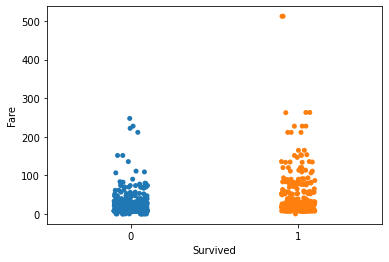

In [ ]:
import seaborn as sns

sns.stripplot(data=df, x='Survived', y='Fare')

One of the most useful features in Seaborn is the ability to make _pair plots_, which show correlations between different variables. Essentially, you can pick a subset of your variables, and ask Seaborn to build a scatterplot for every pair of variables, enabling rapid inspection of potential relationships. For example, in the plot below, it appears that the fare (`Fare`) and age (`Age`) are not highly correlated, whereas there is a clear relationship between the age (`Age`) and number of siblings or spouses (`SibSp`).

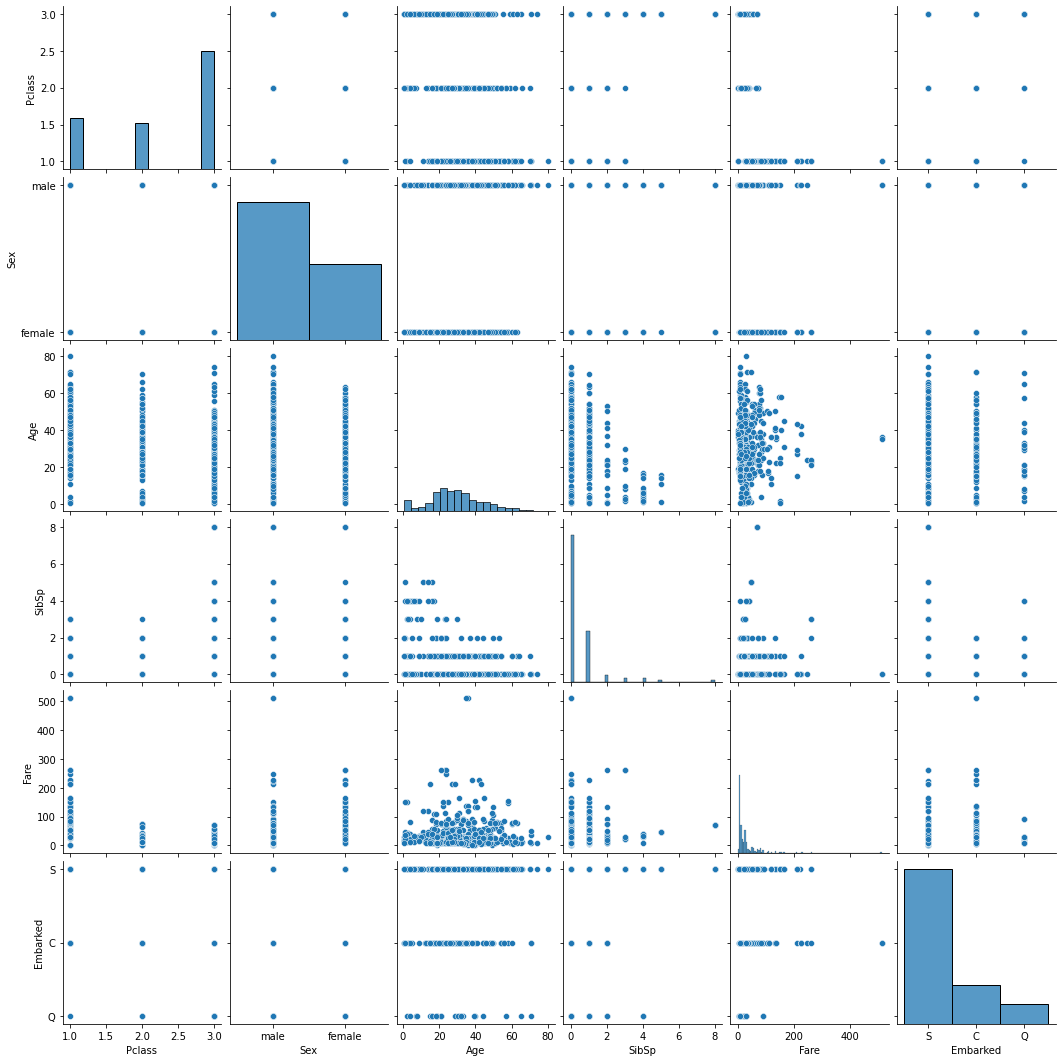

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
sns.pairplot(df, x_vars=features, y_vars=features)

**Exercise 3**. Build the following plots:

- A `pie()` plot to see the distribution of gender in the passengers of the titanic.
- A `hist()` plot to see the distribution of fare amongst the passengers.
- A `stripplot()` (using Seaborn) to see the relation between age and survival. Can you propose any hypotheses from this plot?

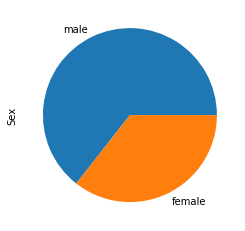

In [ ]:
df['Sex'].value_counts().plot.pie()

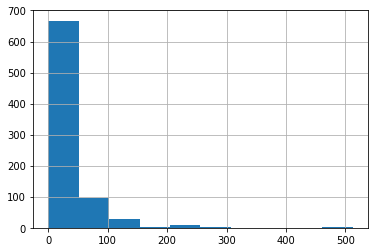

In [ ]:
df['Fare'].hist()

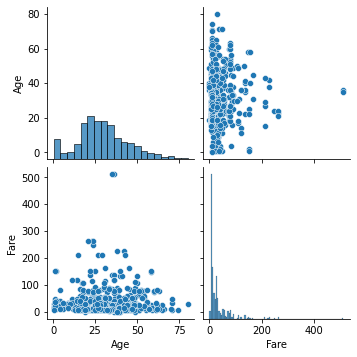

In [ ]:
features = ['Age', 'Fare']
sns.pairplot(df, x_vars=features, y_vars=features)

## Filling in missing values

One of life's hard truths is that most data contains missing values, which can be a challenge when trying to analyze and interpret the data. Missing values can occur for a variety of reasons, such as errors in data collection or data entry, data that was not collected or recorded, or data that was lost or corrupted. Regardless of the cause, missing values can significantly impact the results of your analysis, as they can bias or distort the data and make it more difficult to draw accurate conclusions.

To put it shortly: **cleaning and processing your data efficiently may be more important for your end result than the machine learning methods you are using**

There are multiple questions to ask when dealing with this dataset:

- *What is causing the missing data?* If there is a random reason (noise of some sort, someone forgets to write down values, some things aren't well-defined, etc.), then that's normally fine and we can use statistical techniques to fix the problem. If there is an intrinsic reason why some data is missing, then correcting the missing data can introduce huge biases in our model.
- *How much data is actually missing?* If it's a small proportion, it may be better to ignore the mislabelled samples altogether.
- *What kind of data is missing?* Some features may be intrinsically noisy and difficult to label, while others are stable and informative. In some cases it makes sense to ignore the former and keep only the latter.

After we have considered these questions carefully, we can then proceed to *data imputation*, the process of replacing missing data with substituted values.

The simplest technique to imputate missing values is to replace missing numerical values by the median of that variable, and missing categorical values by the most common category.

In [ ]:
df

,Unnamed: 0,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,3.0,male,1.0,0,A/5 21171
1,1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,1.0,female,1.0,1,NaN
2,2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",NaN,3.0,female,NaN,1,STON/O2. 3101282
3,3,4,35.0,C123,S,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1.0,female,NaN,1,113803
4,4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0.0,3.0,NaN,0.0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,27.0,NaN,NaN,13.0000,"Montvila, Rev. Juozas",0.0,2.0,male,0.0,0,NaN
887,887,888,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,1.0,female,0.0,1,112053
888,888,889,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,3.0,female,1.0,0,W./C. 6607
889,889,890,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",NaN,1.0,male,NaN,1,111369


How do we assign these values to the missing data? One of the multiple ways to do it is to use the `.loc()` selector in Pandas. To use the .loc indexer, you need to specify the row and column labels that you want to select. You can do this by passing the labels to the .loc indexer as a list or a slice.

In [ ]:
print('Before imputation, there are', df['Age'].isnull().sum(), 'missing age values')
rows_missing_age = df[df['Age'].isnull()]
null_indices = rows_missing_age.index
df.loc[null_indices, 'Age'] = imputated_age
print('After imputation, there are', df['Age'].isnull().sum(), 'missing age values')

Before imputation, there are 243 missing age values
After imputation, there are 0 missing age values


In [ ]:
null_indices

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  37,
            ...
            838, 839, 846, 849, 850, 859, 863, 868, 878, 888],
           dtype='int64', length=243)

**Exercise 4.** About 10% of the features in the dataset are missing (they are represented as `NaN`, or "not a number"). Write code to imputate these values, with the following criteria:

- For numerical variables (`Age`, `Fare`), fill missing values with the median value.
- For categorical variables (`Embarked`, `Parch`, `Pclass`, `Sex` and `SibSp`), fill missing values using the most common label.

## Conclusions

Well, so this is it! In this lecture, we have discussed:

- How to load CSV files into Pandas
- How to perform queries in a dataset
- How to do exploratory data analysis using statistical descriptors and plots
- How to clean data and imputate a dataset

In the next lecture, we will be using these tools to build a machine learning model to predict the likelihood that a person survives an accident like the Titanic disaster.